In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [2]:
# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target  # Adding actual class labels for comparison (not used in clustering)

In [4]:
# Drop the species column for unsupervised learning
X = df.drop(columns=['species'])

In [5]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# K-Means Clustering
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

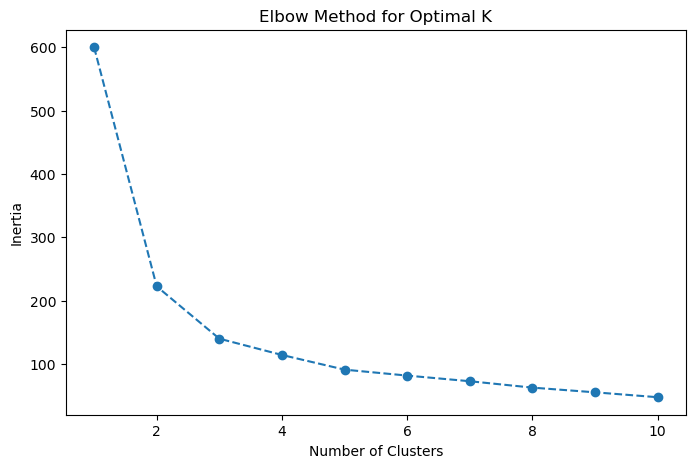

In [9]:
# Elbow Method Visualization
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig('elbow_method.png')
plt.show()

In [10]:
# Fit K-Means with optimal clusters (K=3 based on Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


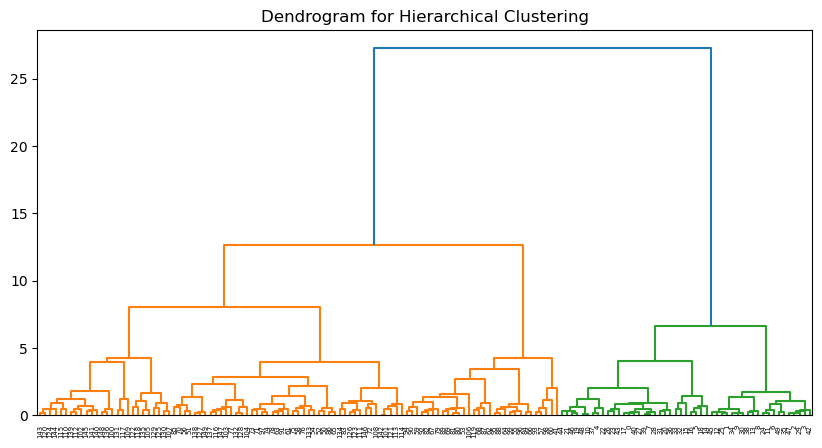

In [11]:
# Hierarchical Clustering (Agglomerative)
plt.figure(figsize=(10, 5))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.savefig('dendrogram.png')
plt.show()

In [12]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

In [13]:
# Evaluation Metrics
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_labels)
ari_kmeans = adjusted_rand_score(df['species'], kmeans_labels)
ari_hierarchical = adjusted_rand_score(df['species'], hierarchical_labels)

print(f'Silhouette Score (K-Means): {silhouette_kmeans:.4f}')
print(f'Silhouette Score (Hierarchical): {silhouette_hierarchical:.4f}')
print(f'Adjusted Rand Index (K-Means): {ari_kmeans:.4f}')
print(f'Adjusted Rand Index (Hierarchical): {ari_hierarchical:.4f}')

Silhouette Score (K-Means): 0.4599
Silhouette Score (Hierarchical): 0.4467
Adjusted Rand Index (K-Means): 0.6201
Adjusted Rand Index (Hierarchical): 0.6153


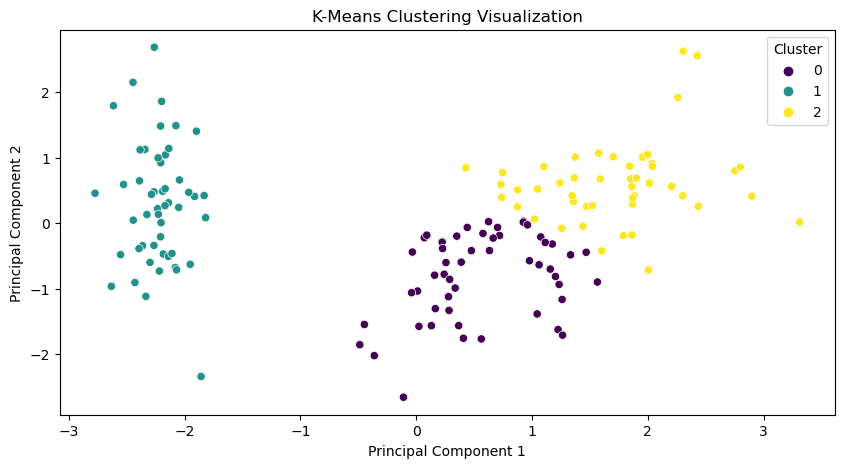

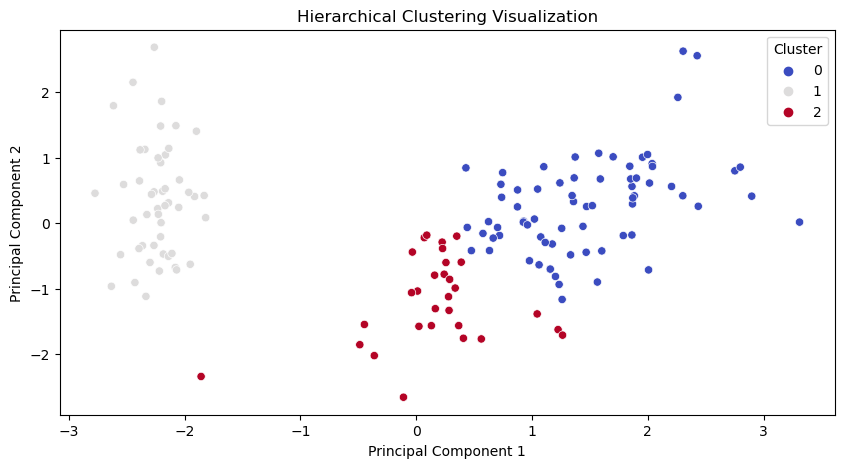

In [14]:
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette='coolwarm')
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
